In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('Semyon - winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
nan_counts = df.isnull().sum()
nan_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Wow we have no NaN values., its very nice

Distribution of wine quality ratings:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


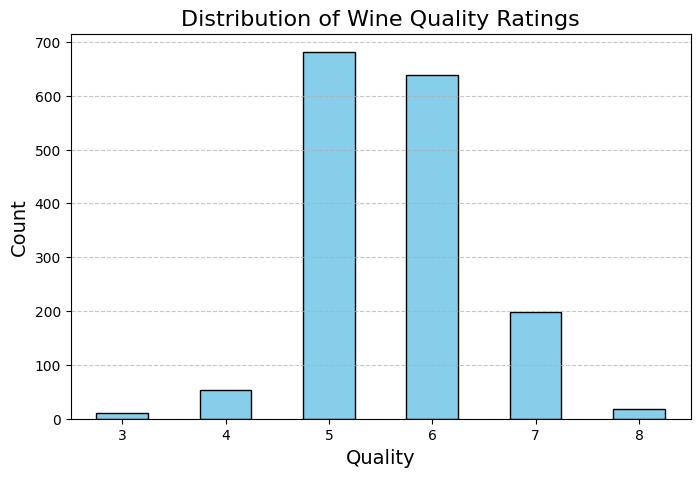

In [4]:
quality_counts = df['quality'].value_counts()

print("Distribution of wine quality ratings:")
print(quality_counts)

plt.figure(figsize=(8, 5))
quality_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

As we can see, we have a lot of data points on 5th and 6th quality but very very few of other qualities

In [5]:
X = df.iloc[:, :-1]
y = df['quality']

In [6]:
X[:4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8


In [7]:
y[:4]

0    5
1    5
2    5
3    6
Name: quality, dtype: int64

In [8]:
base_model = LogisticRegression(random_state=42).fit(X[:-4], y[:-4])

/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
bad_y_pred = base_model.predict(X[-4:])
bad_y_pred

array([6, 6, 5, 6])

In [10]:
accuracy_score(y[-4:], bad_y_pred)

1.0

Now that we have crated base model, we can create a way better model that will have better metrics and predict better

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
good_model = LogisticRegression(random_state=42, max_iter=7000).fit(X_train, y_train)
good_y_pred = good_model.predict(X_test)
accuracy_score(y_test, good_y_pred)

0.571969696969697

Using grid search

In [14]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=7000), param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, max_iter=7000, random_state=42)

In [15]:
grid_search.best_params_

{'C': 0.1, 'solver': 'lbfgs'}

In [16]:
best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred)

0.5757575757575758

In [17]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.64      0.77      0.70       217
           6       0.53      0.58      0.55       213
           7       0.45      0.20      0.28        70
           8       0.00      0.00      0.00         7

    accuracy                           0.58       528
   macro avg       0.27      0.26      0.25       528
weighted avg       0.53      0.58      0.55       528



/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Now lets try to do sth with data, to enhance models performace

In [18]:
correlation_matrix = df.corr()

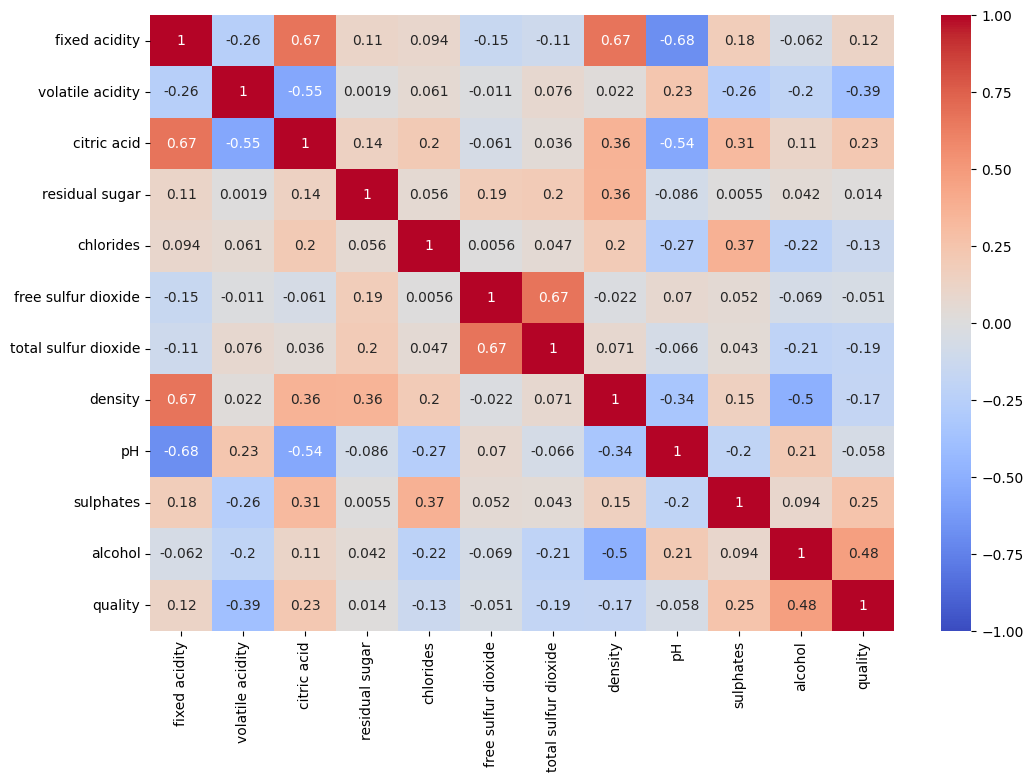

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Lets clean duplicated values

In [20]:
duplicates = df.duplicated()

# df = df.drop(columns=df[duplicates])
duplicates

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [21]:
df = df.drop_duplicates()

Distribution of wine quality ratings:
quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


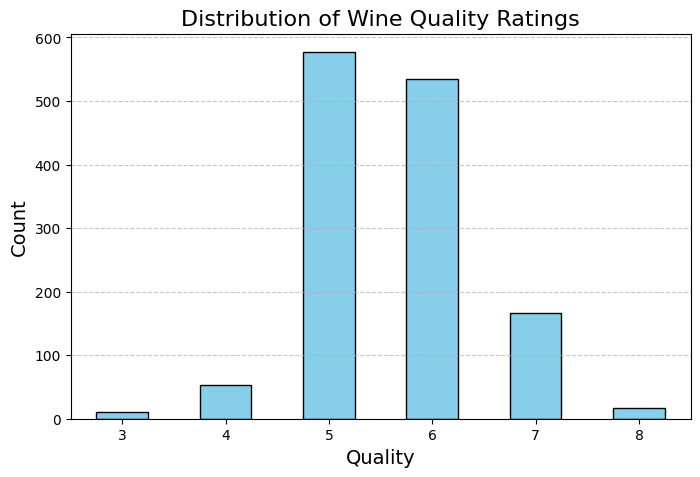

In [22]:
quality_counts = df['quality'].value_counts()

print("Distribution of wine quality ratings:")
print(quality_counts)

plt.figure(figsize=(8, 5))
quality_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [23]:
X = df.iloc[:, :-1]
y = df['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'solver': ['lbfgs', 'saga', 'liblinear'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'warm_start': [True, False],
#     'l1_ratio': [0.1, 0.5, 0.9]
# }
# grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=15000, tol=1e-6, n_jobs=-1), param_grid, cv=2)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# best_model

In [26]:
best_model1 = LogisticRegression(
    C=1,
    max_iter=15000,
    n_jobs=-1,
    penalty='l1',
    random_state=42,
    solver='saga',
    tol=1e-08,
    warm_start=True
)

best_model1 = best_model1.fit(X_train, y_train)

/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
best_pred1 = best_model1.predict(X_test)
accuracy_score(y_test, best_pred1)

0.5946547884187082

In [28]:
results = cross_validate(best_model1, X_train, y_train, cv=5, scoring=['accuracy'], return_train_score=False)

print(results['test_accuracy'].mean())

/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.5659340659340659


/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'solver': ['lbfgs', 'saga', 'liblinear'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'warm_start': [True, False],
#     'l1_ratio': [0.1, 0.5, 0.9]
# }
# grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=15000, tol=1e-6, n_jobs=-1), param_grid, cv=2)
# grid_search.fit(X_train_selected, y_train)

# best_model = grid_search.best_estimator_
# best_model

In [30]:
best_model2 = LogisticRegression(
    C=10,
    max_iter=2000000,
    solver='saga',
    n_jobs=-1,
    random_state=42,
    tol=1e-8,
    warm_start=True
)
best_model2 = best_model2.fit(X_train, y_train)

/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
best_pred2 = best_model2.predict(X_test)

results = cross_validate(best_model2, X_train, y_train, cv=5, scoring=['accuracy'], return_train_score=False)

print(results['test_accuracy'].mean())

/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.567032967032967


/home/semyonsw/Desktop/Python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
